In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
from textblob import TextBlob
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
from tqdm import tqdm
# Style use.
sns.set_style('darkgrid')



c:\Users\mbial\miniconda3\envs\nkobo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbial\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
len(stop_words)

157

In [4]:
stop_words

{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [5]:
for i in ["le", "mr", "eto", "qu", "est", "c'est","qu", "juste", "master", "class", "toujours", "vraiment","si", "quand", "jai","j'ai", "beaucoup","déjà", "deja", "nest","n'est", "franchement", "cet", "vois", "ceux","ici", "mme","quil", "qu'il","trs","cette", "très", "trop", "cest",  "c'est","comme", "tout", "plus", "bien", "faire", "aussi", "fait", "peut", "tre","très","quel", "sans", "autre", "donc", "tous", "faut", "peu", "dit", "avoir", "non", "fois", "ans", "alors", "sont", "peu", "peux", "peut", "cest","c'est"]:
    stop_words.add(i)

In [6]:
df = pd.read_csv('comments.csv')
print(df.shape)
df.head()

(1183, 1)


,0
0,J'ai adoré cette phrase d'Eto'o '' Ce ne sont ...
1,Aurélien après ta carrière tu feras un bon jou...
2,Les anecdotes de Eto’o sont trois fois plus lo...
3,Arrêttons nous un instant pour apprécier la qu...
4,C’est la première fois de ma vie que je regard...


In [7]:
comments = df[df.columns[0]].values


# 1. preprocessing step

In [8]:
from tqdm import tqdm

In [93]:
def preprocess_comments(comments):
    cleaned_comments = []
    new_comments = []
    for comment in tqdm(comments):
        try:
            tmp = comment
            comment = re.sub(r'http\S+', '', comment)  # Remove URLs
            #comment = re.sub(r'[^A-Za-z0-9\s]+', '', comment)  # Remove special characters
            comment = comment.lower()  # Convert to lowercase
            comment = ' '.join([word for word in comment.split() if word not in stop_words])  # Remove stop words
            if len(comment.split(" "))>=3:
                cleaned_comments.append(comment)
                new_comments.append(tmp)
        except:
            print(comment)
    return cleaned_comments, new_comments

In [94]:
cleaned_comments, new_comments = preprocess_comments(comments)

100%|██████████| 1183/1183 [00:00<00:00, 131443.53it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


In [95]:
len(set(cleaned_comments))

956

In [96]:
print(cleaned_comments[24])

respect grand frère samuel eto'o parce grand frère impressionnant, respect chacun sait écouter sait écouter émission captivante expériences projets tire leçons


# 2. Wordcloud

In [65]:
def generate_word_cloud(comments):
    text = ' '.join(comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, min_word_length=4).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

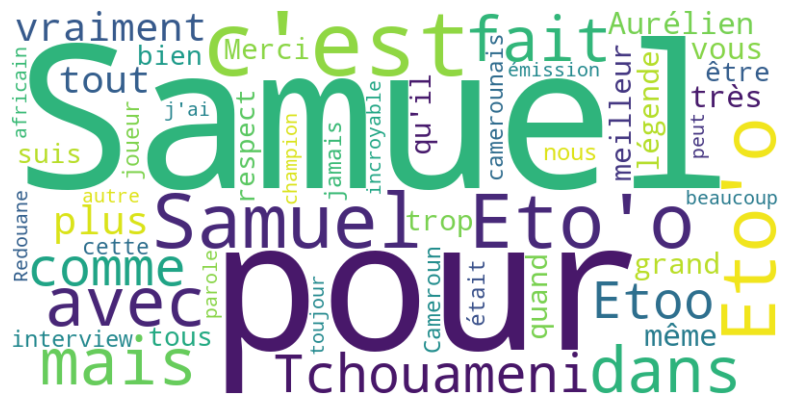

In [21]:
generate_word_cloud(new_comments)

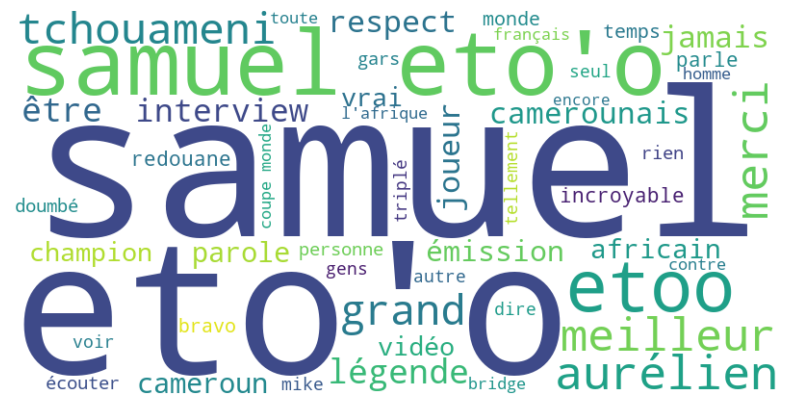

In [66]:
generate_word_cloud(cleaned_comments)

# 2. Topic modelling

In [22]:
from sentence_transformers import SentenceTransformer

In [23]:

sentence_model = SentenceTransformer("dangvantuan/sentence-camembert-base")



In [97]:
# Step 6: Extract Main Topics with BERTopic
def extract_topics_bertopic(comments, sentence_model=sentence_model):
    topic_model = BERTopic( n_gram_range=(1, 3), embedding_model=sentence_model,  min_topic_size=5, language="french")
    topics, probs = topic_model.fit_transform(comments)
    return topic_model

In [98]:
topic_model = extract_topics_bertopic(cleaned_comments)

In [99]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,320,-1_eto_samuel_qu_est,"[eto, samuel, qu, est, etoo, doumbé, être, gra...","[cédric perdu combat face baki , point final....."
1,0,72,0_samuel_02_samuel samuel_oh,"[samuel, 02, samuel samuel, oh, samuel 02, oh ...","[1:02:54 ça tue samuel abuse bail, oh samuel ,..."
2,1,57,1_eto_eto eto_papa_papa eto,"[eto, eto eto, papa, papa eto, etooo, monsieur...","[touche eto'o, eto'o continent, touche eto'o, ..."
3,2,47,2_samuel eto_samuel_eto_eto samuel,"[samuel eto, samuel, eto, eto samuel, eto samu...","[samuel eto'o meilleur, légende samuel eto'o ️..."
4,3,42,3_tchouameni_tchouaméni_tchouameni bon_tchouam...,"[tchouameni, tchouaméni, tchouameni bon, tchou...","[tchouameni, bon présentateur, aurélien tchoua..."
5,4,34,4_parole_etoo_grand_encore,"[parole, etoo, grand, encore, respect, raconte...",[raconte eto'o bête simpliste. parle qatar exe...
6,5,29,5_inter_jamais_mi_mi temps,"[inter, jamais, mi, mi temps, temps, match, tr...",[truc gole-ri samuel eto'o n'a jamais marqué 3...
7,6,22,6_interview_épisode_réunion_1h30,"[interview, épisode, réunion, 1h30, régal, 30,...",[c’est première vie regarde 1h30 d’interview l...
8,7,19,7_vidéo_connaissance_afrique_être,"[vidéo, connaissance, afrique, être, opportuni...","[incroyable, vidéo ! pris immense plaisir écou..."
9,8,19,8_personnes_sujets_parler_intéressant,"[personnes, sujets, parler, intéressant, laiss...","[tellement vrai gars, lasse d'écouter intervie..."


In [73]:
topic_model.visualize_barchart(n_words=10, topics=[1,2,3,4,5, ], height=300, width=300)

In [74]:
probs

array([0.        , 0.94156988, 0.71052478, ..., 1.        , 0.71416397,
       0.        ])

In [40]:
topic_model.visualize_heatmap()

## Amélioration du BERT Topic

In [100]:
from bertopic.vectorizers import ClassTfidfTransformer
from hdbscan import HDBSCAN
from umap import UMAP

In [101]:
dim_reduction_model = UMAP(
 n_neighbors=10,
 n_components=50,
 min_dist=0.0,
 metric="cosine",
 random_state=42,
 )

In [102]:
clustering_model = HDBSCAN(
 min_cluster_size=10,
 metric="euclidean",
 cluster_selection_method="eom",
 prediction_data=True,
)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
ctfidf_model = ClassTfidfTransformer(
 bm25_weighting = False,
 reduce_frequent_words = False,
 # seed_words = None,
 # seed_multiplier = 2,
 )

In [105]:
topic_model = BERTopic(
    n_gram_range=(1, 3), 
    embedding_model=sentence_model,  
    min_topic_size=5, 
    language="french",
    umap_model=dim_reduction_model,
    hdbscan_model=clustering_model,
    ctfidf_model=ctfidf_model,
    
)


In [106]:
topics, probs = topic_model.fit_transform(cleaned_comments)

In [118]:
topic_model.visualize_documents(docs = cleaned_comments)

In [107]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,361,-1_eto_est_etoo_samuel,"[eto, est, etoo, samuel, être, ça, qu, redouan...",[raconte eto'o bête simpliste. parle qatar exe...
1,0,73,0_samuel_02_samuel samuel_oh samuel,"[samuel, 02, samuel samuel, oh samuel, samuel ...","[oh samuel ️, 1:02:51 nouvelle célèbre réf tik..."
2,1,70,1_samuel eto_samuel_eto_samuel etoo,"[samuel eto, samuel, eto, samuel etoo, eto sam...","[samuel eto'o fils, légende samuel eto'o 🇨🇲🇨🇲🇨..."
3,2,52,2_eto_papa_papa eto_grand,"[eto, papa, papa eto, grand, etooo, eto eto, e...","[touche eto'o, eto'o continent, touche eto'o, ..."
4,3,45,3_tchouameni_tchouaméni_bon_tchouameni bon,"[tchouameni, tchouaméni, bon, tchouameni bon, ...","[tchouameni, bon présentateur, aurélien tchoua..."
5,4,42,4_interview_30_laisse_super,"[interview, 30, laisse, super, personnes, invi...","[tellement vrai gars, lasse d'écouter intervie..."
6,5,37,5_inter_jamais_mi_mi temps,"[inter, jamais, mi, mi temps, temps, triplé, m...",[eto'o s'invente vie mdr n'a jamais marqué tri...
7,6,36,6_parole_ça_qu_respect,"[parole, ça, qu, respect, grand, encore, ca, f...","["" veux joueur caractère, importe m'insulte, d..."
8,7,33,7_aurélien_aurelien_journaliste_bon,"[aurélien, aurelien, journaliste, bon, bravo, ...","[possible, aurélien reconvertis journalisme ap..."
9,8,32,8_émission_merci_super_super émission,"[émission, merci, super, super émission, émiss...","[aimé l'émission merci, super émission super, ..."


In [36]:
topic_model.visualize_barchart(n_words=10, topics=[1,2,3,4,5, ], height=300, width=300)

In [59]:
topic_model.visualize_heatmap()

In [37]:
probs

array([0.        , 0.94156988, 0.71052478, ..., 1.        , 0.71416397,
       0.        ])

In [108]:
infos_topics = topic_model.get_topic_info()
infos_topics.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,361,-1_eto_est_etoo_samuel,"[eto, est, etoo, samuel, être, ça, qu, redouan...",[raconte eto'o bête simpliste. parle qatar exe...
1,0,73,0_samuel_02_samuel samuel_oh samuel,"[samuel, 02, samuel samuel, oh samuel, samuel ...","[oh samuel ️, 1:02:51 nouvelle célèbre réf tik..."
2,1,70,1_samuel eto_samuel_eto_samuel etoo,"[samuel eto, samuel, eto, samuel etoo, eto sam...","[samuel eto'o fils, légende samuel eto'o 🇨🇲🇨🇲🇨..."
3,2,52,2_eto_papa_papa eto_grand,"[eto, papa, papa eto, grand, etooo, eto eto, e...","[touche eto'o, eto'o continent, touche eto'o, ..."
4,3,45,3_tchouameni_tchouaméni_bon_tchouameni bon,"[tchouameni, tchouaméni, bon, tchouameni bon, ...","[tchouameni, bon présentateur, aurélien tchoua..."


In [110]:
print(infos_topics['Representative_Docs'].iloc[11])

['cédric doumbé meilleur combattant français.... connu certainement, meilleur....', 'arrêté « meilleur combattant français cédric doumbe »', 'meilleur combattant français cédric doumbe mdr']


In [40]:
from langchain.prompts.chat import (
    ChatPromptTemplate,
)

In [111]:
prompt = """
<|système|>
Tu es un agent qui permet de donner un titre à un ensemble de topic que l'utilisateur te donnera. Donne uniquement le titre comme réponse.

<|utilisateur|>
Topics :
{topics}


"""

In [42]:
from langchain.chat_models import ChatOpenAI

In [76]:
#!pip install langchain_community

In [80]:
#!pip install openai

In [43]:
OPENAI_API_KEY = ""




C:\Users\mbial\AppData\Local\Temp\ipykernel_13188\3447722831.py:3: LangChainDeprecationWarning:

The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.



In [112]:
eval_chat_model = ChatOpenAI(model="gpt-4-1106-preview", temperature=0.9, openai_api_key=OPENAI_API_KEY)

In [113]:
" ".join(infos_topics['Representation'].iloc[11])

'combattant meilleur combattant cédric meilleur combattant français meilleur combattant français doumbé français doumbe cédric doumbe'

In [114]:
final_prompt = prompt.format(topics = " ".join(infos_topics['Representation'].iloc[11])
                             )
print(final_prompt)


<|système|>
Tu es un agent qui permet de donner un titre à un ensemble de topic que l'utilisateur te donnera. Donne uniquement le titre comme réponse.

<|utilisateur|>
Topics :
combattant meilleur combattant cédric meilleur combattant français meilleur combattant français doumbé français doumbe cédric doumbe





In [115]:
infos_topics.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,361,-1_eto_est_etoo_samuel,"[eto, est, etoo, samuel, être, ça, qu, redouan...",[raconte eto'o bête simpliste. parle qatar exe...
1,0,73,0_samuel_02_samuel samuel_oh samuel,"[samuel, 02, samuel samuel, oh samuel, samuel ...","[oh samuel ️, 1:02:51 nouvelle célèbre réf tik..."
2,1,70,1_samuel eto_samuel_eto_samuel etoo,"[samuel eto, samuel, eto, samuel etoo, eto sam...","[samuel eto'o fils, légende samuel eto'o 🇨🇲🇨🇲🇨..."
3,2,52,2_eto_papa_papa eto_grand,"[eto, papa, papa eto, grand, etooo, eto eto, e...","[touche eto'o, eto'o continent, touche eto'o, ..."
4,3,45,3_tchouameni_tchouaméni_bon_tchouameni bon,"[tchouameni, tchouaméni, bon, tchouameni bon, ...","[tchouameni, bon présentateur, aurélien tchoua..."
5,4,42,4_interview_30_laisse_super,"[interview, 30, laisse, super, personnes, invi...","[tellement vrai gars, lasse d'écouter intervie..."
6,5,37,5_inter_jamais_mi_mi temps,"[inter, jamais, mi, mi temps, temps, triplé, m...",[eto'o s'invente vie mdr n'a jamais marqué tri...
7,6,36,6_parole_ça_qu_respect,"[parole, ça, qu, respect, grand, encore, ca, f...","["" veux joueur caractère, importe m'insulte, d..."
8,7,33,7_aurélien_aurelien_journaliste_bon,"[aurélien, aurelien, journaliste, bon, bravo, ...","[possible, aurélien reconvertis journalisme ap..."
9,8,32,8_émission_merci_super_super émission,"[émission, merci, super, super émission, émiss...","[aimé l'émission merci, super émission super, ..."


In [116]:
for i in range(1, len(infos_topics)):
    final_prompt = prompt.format(topics = " ".join(infos_topics['Representative_Docs'].iloc[i]))
    answer = eval_chat_model.invoke(final_prompt)
    print(answer.content)


"Le Phénomène Viral de 'Oh Samuel' sur TikTok"
"La Légende de Samuel Eto'o Fils: Héritage d'un Champion Camerounais"
"Les Multiples Facettes du Continent à Travers le Prisme d'Eto'o"
"Aurélien Tchouaméni et la Polémique de Respect envers Samuel Eto'o"
"Réflexions sur la Croissance Personnelle et Échanges Profonds : Retour sur 'The Bridge'"
"Vérification des faits sur le triplé de Samuel Eto'o lors d'un match de l'Inter Milan"
"Réflexions sur le Leadership et la Nature Humaine dans le Football et la Société"
"La reconversion réussie d'Aurélien Tchouaméni dans le journalisme sportif"
"Avis enthousiaste sur une émission de télévision"
"Samuel Eto'o : Légende Africaine et Espoir du Continent"
Cédric Doumbé : Profil du Meilleur Combattant Français
"De la Dinguerie à l'Excellence: Les Ambitions Sans Limites d'Eto'o à travers Anecdotes et Proverbes"
La marque de respect de Samuel Eto'o envers Mike Maignan
"Masterclass de légendes: Ambition, Succès et Inspirations Africaines"
Les Lions Indompt

In [47]:
for i in range(1, len(infos_topics)):
    final_prompt = prompt.format(topics = " ".join(infos_topics['Representative_Docs'].iloc[i]))
    answer = eval_chat_model.invoke(final_prompt)
    print(answer.content)


"Orh Samuel: A Repetitive Focus"
"Exploration de l'Influence de Samuel Eto'o sur le Football Continental"
"Retours Positifs sur une Émission Télévisée"
"La Légende de Samuel Eto'o : Parcours d'un Héros du Football Camerounais"
"Le Respect des Légendes : La Polémique entre Aurélien Tchouaméni et Samuel Eto'o"
"Réflexions sur le Professionnalisme, le Football et la Quête de Vérité"
"Aurélien Tchouaméni : Un Futur Journaliste Sportif Prometteur Après le Football"
"Réflexions sur la Croissance Personnelle et Diversité des Perspectives dans les Interviews"
"Samuel Eto'o et son triplé historique en première mi-temps avec l'Inter Milan"
"Les Controverses autour de Samuel Eto'o : Vérités et Exagérations"
Cédric Doumbé : Le Meilleur Combattant Français
"Célébration des Icônes Sportives Africaines : Hommage à Samuel Eto'o et Fierté Camerounaise"
L'Épopée des Lions Indomptables : Potentiel et Performances (2000-2003)
"Le Respect et l'Humilité de Samuel Eto'o en Accueillant Mike Maignan"
"Confianc

In [48]:
for i in range(1, len(infos_topics)):
    final_prompt = prompt.format(topics = " ".join(infos_topics['Representation'].iloc[i]))
    answer = eval_chat_model.invoke(final_prompt)
    print(answer.content)


"Exploration des Variations de 'Samuel' et 'Orh' dans un Contexte Numérique"
"Les Louanges à Samuel Eto'o"
"Super Émission: Merci à Nos Invités Formidables"
"Samuel Eto'o: Hommage à une Légende du Football"
"Tchouaméni et Eto'o : Éloquence et Présentation dans le Monde du Sport"
"Le Respect et la Parole d'un Grand Joueur: Légende de Baki Eto"
"Le Parcours d'Aurélien : Du Journalisme à la Reconnaissance Professionnelle"
"Conversations Captivantes : Écouter et Partager avec des Invités Exceptionnels"
"Les temps triples et les mi-temps dans les matchs de l'Inter"
"Les Mythes et Réalités autour de Samuel Eto'o et la Prédation dans le Football"
Cédric Doumbé: Le Meilleur Combattant Français
"Samuel Eto'o: La Fierté du Football Africain"
"Triomphe de la France à la Coupe du Monde 2002"
"Mike Maignan : L'humilité et le respect d'un gardien de but au sommet"
"Création de Contenu Vidéo Avancé avec l'IA pour une Première Chaîne YouTube Excellente"
"Les multiples facettes de Guardiola : Entretien

In [49]:
probs

array([0.        , 0.94156988, 0.71052478, ..., 1.        , 0.71416397,
       0.        ])

# 4. sentiment analysis

In [50]:
def classify_comments(comments):
    classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
    categories = ['positive', 'negative']
    classified_comments = []
    scores = []
    for comment in tqdm(comments):
        result = classifier(comment, candidate_labels=categories)
        classified_comments.append(result['labels'][0])
        scores.append(result['scores'][0])
    return classified_comments, scores

In [51]:
classified_comments, scores = classify_comments(cleaned_comments)

100%|██████████| 1096/1096 [10:16<00:00,  1.78it/s]


In [55]:
new_df = pd.DataFrame(
    {
        "sentiment": scores,
        "commentaire": classified_comments
    }
)

In [56]:
new_df.head()

,sentiment,commentaire
0,0.987961,negative
1,0.966440,positive
2,0.685886,positive
3,0.980685,positive
4,0.648160,negative


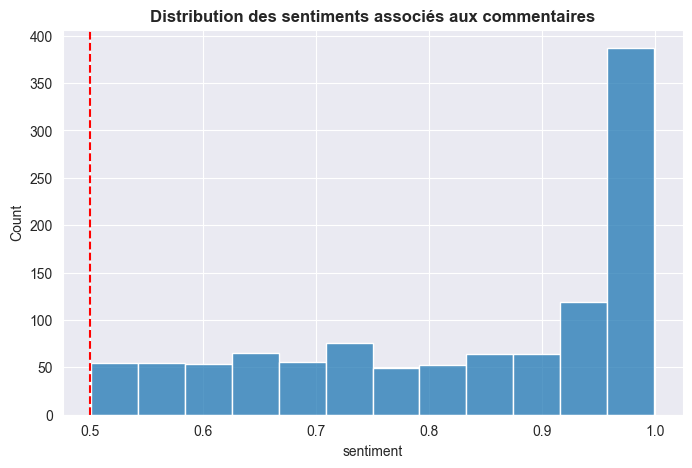

In [59]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'legend.fontsize': 10})
sns.histplot(new_df["sentiment"])
#add a line plot x=1
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title("Distribution des sentiments associés aux commentaires", weight="bold", size=12);

In [220]:
for c in df[df.columns[0]]:
    u = c.split('Pasteur')
    if len(u) > 1:
        print(c)

False

In [211]:
for c in df[ df[df.columns[0]].str.contains("Garoua") ][df.columns[0]].values:
    print(c)

In [181]:
# select comments with a score greater than 0.5
for c in df[df["scores"] > 0.99][df.columns[0]].values:
    print(c)

Impressionné par Aurelien dans son rôle qui maîtrise à mon sens d’une main de maître… excellente émission
Sans des sportifs comme Eto'o le sport ne serait plus une passion. Il est juste incroyable.
Quand tu vois une vidéo pareille, tu as juste envie de te surpasser pour atteindre tes objectifs.
Masterclass messieurs !!
Fier d'être africain, trop fière d'être Camerounais 🇨🇲
Tchaouameni masterclass, verve, intelligence, un très bon animateur ! Quel classe et charisme.
Eto’o peut paraître arrogant parfois mais il était très fort, une légende africaine respect 🫡 depuis le Mali 🇲🇱 
Tchouameni  TRÈS TRÈS BON calme, posé, bravo !!!
Chapeau bas pour Aurélien qui a vraiment fait une masterclass!
Bravo Aurélien, je te découvre sous un autre angle. Tu gères tes intervenants avec la précision d'un match de football : un excellent timing pour distribuer la parole, tout en affichant un charisme impressionnant. Félicitations !
Vrmt respect à vie à etoo très agréable qd il parle il explique énormément